In [2]:
import pandas as pd
import json

C:\Users\verse\AppData\Local\Temp\ipykernel_18332\1177998677.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
actor_id_name_map = {}
actor_genre_map = {}


with open("imdb_movies_2000to2022.prolific.json", "r") as in_file:
    for line in in_file:
        
        # Read the movie on this line and parse its json
        this_movie = json.loads(line)
                    
        # Add all actors to the id->name map
        for actor in this_movie['actors']:
            actor_id = actor[0]
            actor_name = actor[1]

            actor_id_name_map[actor_id] = [actor_name]

            if actor_id not in actor_genre_map:
                actor_genre_map[actor_id] = {}
            
            # For each actor, add this movie's genres to that actor's list
            this_actor_genre_map = actor_genre_map[actor_id]
            
            for g in this_movie['genres']:
                this_actor_genre_map[g] = this_actor_genre_map.get(g, 0) + 1
            
        
        

In [4]:
actor_genre_df = pd.DataFrame(actor_genre_map).T.fillna(0)
actor_genre_df


,Comedy,Fantasy,Romance,Drama,Mystery,Thriller,Action,Biography,Crime,War,...,Horror,Documentary,Sport,News,Family,Music,,Western,Short,Reality-TV
nm0000212,7.0,1.0,6.0,6.0,1.0,2.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0413168,7.0,3.0,5.0,12.0,5.0,2.0,14.0,4.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0000630,8.0,2.0,6.0,14.0,2.0,3.0,4.0,5.0,1.0,1.0,...,3.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0005227,10.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
nm0864851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm9504284,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm10592896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm7216750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nm0936300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.cluster import KMeans
import sklearn

In [17]:
actor_genre_norm_df = pd.DataFrame(sklearn.preprocessing.normalize(actor_genre_df, norm="l1"))
actor_genre_norm_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.250000,0.035714,0.214286,0.214286,0.035714,0.071429,0.035714,0.035714,0.071429,0.035714,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
1,0.081395,0.034884,0.058140,0.139535,0.058140,0.023256,0.162791,0.046512,0.069767,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
2,0.112676,0.028169,0.084507,0.197183,0.028169,0.042254,0.056338,0.070423,0.014085,0.014085,...,0.042254,0.098592,0.042254,0.014085,0.00,0.0,0.0,0.0,0.0,0.0
3,0.400000,0.040000,0.080000,0.080000,0.000000,0.040000,0.040000,0.000000,0.000000,0.000000,...,0.040000,0.000000,0.040000,0.000000,0.08,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33604,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
33605,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
33606,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
33607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0


In [18]:
model = KMeans(n_clusters=8)

In [19]:
model.fit(actor_genre_norm_df)

KMeans()

In [20]:
model.cluster_centers_.shape

(8, 25)

In [21]:
model.inertia_

6206.801873660845

In [23]:
cluster_assigned_df = pd.DataFrame(model.predict(actor_genre_norm_df), columns=['cluster_id'])
cluster_assigned_df.index = actor_genre_norm_df.index

cluster_assigned_df

,cluster_id
0,1
1,7
2,7
3,1
4,1
...,...
33604,6
33605,6
33606,6
33607,7


In [24]:
cluster_assigned_df['cluster_id'].value_counts()

cluster_id
7    10349
1     6487
5     4365
3     4168
6     3684
0     1998
2     1598
4      960
Name: count, dtype: int64

In [27]:
for i in range(8):
    this_cluster = cluster_assigned_df[cluster_assigned_df['cluster_id'] == i]
    print('Cluster', i, this_cluster.shape[0])

    this_genre_counts = pd.DataFrame(actor_genre_norm_df.loc[this_cluster.index].sum(axis=0), columns=['count'])
    display(this_genre_counts.sort_values(by="count", ascending=False).head(5))

Cluster 0 1998


,count
0,1984.497619
15,2.777778
3,2.116667
1,1.333333
17,1.285714


Cluster 1 6487


,count
0,2464.594376
3,1390.012553
2,821.708508
15,297.754794
10,211.757862


Cluster 2 1598


,count
15,1576.221184
0,8.456600
3,2.772619
5,2.411069
11,1.872222


Cluster 3 4168


,count
3,4090.432143
0,22.292857
2,12.166667
5,11.452381
8,5.983333


Cluster 4 960


,count
5,952.404762
3,3.009524
6,1.342857
10,1.000000
0,0.866667


Cluster 5 4365


,count
6,1961.056496
3,533.538110
5,356.303529
8,345.384813
10,257.533086


Cluster 6 3684


,count
15,1198.167098
5,969.293323
4,409.016242
3,279.429627
11,179.505310


Cluster 7 10349


,count
3,2875.040177
5,853.690267
8,822.675942
2,652.678008
19,534.869300


In [28]:
rows = []
for k in range(2, 20):
    model = KMeans(n_clusters=k, n_init="auto")
    model.fit(actor_genre_norm_df)
    rows.append({
        "k": k,
        "inertia": model.inertia_,
    })

    print(k, model.inertia_)

2 11907.183524867742
3 10060.206836301231
4 9581.993222010613
5 7970.25651724528
6 7713.881871787546
7 6615.176920518865
8 6402.176700698813
9 5975.570929280287
10 5599.286960379828
11 5503.901917800058
12 5321.242138986558
13 4933.3458836858645
14 4673.505864725103
15 4239.256028259346
16 4143.267028753412
17 3906.9851920025912
18 3915.03228568908
19 3732.4500413682


<Axes: xlabel='k'>

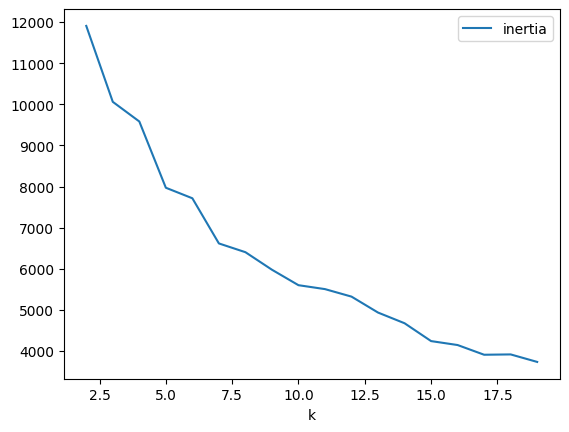

In [30]:
pd.DataFrame(rows).set_index("k").plot()